In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
# Revisar la cantidad de tipos de datos y valores nulos por cada columna de un dataframe

def df_count_types(df):
    '''
    Obtener los tipos de datos unicos y sus respectivos recuentos para cada columna.
    Funcion que recibe como parámetro un dataframe
    '''
    # Aplicar la función a todas las columnas del DataFrame
    result = df.apply(lambda col: col.apply(type) .value_counts())         
    # Transponer el resultado y restablecer el índice
    result = result.T.reset_index()                                         
    # Renombrar las columnas
    result. columns = ["Column"] + result.columns[1:].tolist()              

    # Hallamos los valores nulos y se almacenan en una serie
    serie_nulos = df.isnull().sum()                                         
    # Convierte el índice en una columna
    serie_nulos = serie_nulos.reset_index()                                 
    # Asigna un nombre a la columna del índice si es necesario
    serie_nulos.columns = ['Column', 'Nulos']                               

    df_1 = result
    df_2 = serie_nulos
    columna_union = "Column"
    # Realizar un left join entre df_userdata y df_games
    df_merge = df_1.merge(df_2, on=columna_union, how='left')               
    # Porcentaje total de registros nulos
    df_merge["Nulos %"] = round(df_merge["Nulos"] / df.shape[0] * 100, 2)   
    
    # Filas que se encuentran totalmente en nulo
    print("\nfilas completamente nulas: ", df.isna().all(axis=1).sum())     

    return df_merge

In [7]:
def col_data_types(df, col):
    '''
    Función para hallar el tipo de datos que maneja una columna, la cantidad de valores únicos que tiene de cada tipo y cuáles son estos valores.
    Recibe como parámetro una columna de df.
    '''
    columna = df[col]
    # Crear una lista para almacenar los resultados
    tipos_de_datos = columna.apply(type).unique()

    for tipo in tipos_de_datos:
        resultados = []
        filtro = columna.apply(lambda x: isinstance(x, tipo))
        total_valores = filtro.sum()
        valores_unicos = columna[filtro].unique()
        porcentaje_col = str(round(total_valores / len(columna) * 100, 2)) + "%"
        porcentaje_tipo = str(round(len(valores_unicos) / total_valores * 100, 2)) + "%"

        # Agregar los resultados a la lista
        resultados.append([tipo, total_valores, porcentaje_col, len(valores_unicos), porcentaje_tipo])

        # Crear un DataFrame con los resultados
        resultado_df = pd.DataFrame(resultados, columns=['Tipo Dato', 'Cant. Valores', '% en Columna', 'Cant. Val. Únicos', '% de únicos'])

        print(resultado_df.T)
        print()
        print(f'Valores únicos: {valores_unicos}')
        print('\n')

In [8]:
def df_data_types(df):
    '''
    Función para revisar la sintaxix, estructura y formato de los datos de todas las columnas del df. Recibe como parmámetro un df.
    '''
    for indice in range (0, len(df.columns)):
        print("NOMBRE COLUMNA: ", df.columns[indice])
        col_data_types(df, df.columns[indice])
        print("-------------------------------------------------------------")

In [9]:
def col_order_values(df, col):
    '''
    Función que retorna una lista de valores únicos de tipo str de una columna ordenados alfabéticamente.
    Recibe como parámetros un DataFrame y el nombre de la columna.
    '''
    # Obtener los valores únicos de la columna
    valores_unicos = df[col].unique()

    # Filtrar y ordenar alfabéticamente los valores únicos de tipo str
    valores_str_ordenados = sorted([valor for valor in valores_unicos if isinstance(valor, str)])

    return valores_str_ordenados

In [10]:
def col_statistics(df, col):
    '''
    Función para obtener los valores estadísticos de una columna
    '''
    columna = df[col]
    # Cantidad de registros unicos de la columna
    print("registros únicos: ", columna.nunique())

    # estadisticas generales
    print()
    print(columna.describe())

    # Porcentaje que representa cada valor dato respecto a toda la columna
    conteo_datos = columna.value_counts()
    total_datos = len(columna)
    porcentaje_victimas = round((conteo_datos / total_datos) * 100, 2)

    # Combina los resultados en un nuevo DataFrame
    resultados = pd.DataFrame({"Cantidad": conteo_datos, "Porcentaje (%)": porcentaje_victimas})
    
    # y deseas ordenarlo de manera descendente según la columna "Cantidad"
    resultados = resultados.sort_values(by="Cantidad", ascending=False)

    print()
    print(resultados)

1-Comprensión del Negocio:

Objetivo:
El propósito es entender el contexto general para analizar los datos y abordar de manera coherente las solicitudes presentadas. El enfoque está en una base de datos sobre accidentes viales en la Ciudad de Buenos Aires entre 2016 y 2021, con el objetivo crucial de reducir las tasas de mortalidad relacionadas con estos incidentes mediante la prevención.

Observaciones y Conclusiones:
Se busca reducir la tasa de homicidios en siniestros viales y la cantidad de accidentes mortales de motociclistas. Se establecen objetivos específicos con sus indicadores de rendimiento (KPIs) y fórmulas para evaluar el progreso.

Objetivo 1:
Reducir un 10% la tasa de homicidios en siniestros viales en los últimos seis meses en comparación con el semestre anterior en CABA.

KPI 1:
Tasa de homicidios en siniestros viales: (Número de homicidios / Población total) * 100,000.

Fórmula 1:
Porcentaje de variación: {[(Homicidios del semestre anterior / Población total del semestre anterior) - (Homicidios del semestre actual / Población total del semestre actual)] / (Homicidios del semestre anterior / Población total del semestre anterior)} * 100.

Objetivo 2:
Reducir un 7% la cantidad de accidentes mortales de motociclistas en el último año en comparación con el año anterior en CABA.

KPI 2:
Cantidad de accidentes mortales de motociclistas: [(Accidentes mortales en el año anterior - Accidentes mortales en el año actual) / Accidentes mortales en el año anterior] * 100.

Objetivo 3:
Planteado por el analista con un KPI 3 y fórmula específica.

2-Exploración Inicial:

Objetivo:
Recopilar datos necesarios para el análisis desde diversas fuentes, como bases de datos o archivos CSV, y verificar la relevancia de los campos según el contexto.

Pasos:

Verificar la estructura general del conjunto de datos explorando las primeras filas y columnas.
Evaluar la consistencia de los datos, incluyendo la integridad de fechas, la presencia de valores faltantes y posibles errores tipográficos.

In [11]:
# importar la hoja de "hechos" del archivo "homicidios.xls"
df_hechos = pd.read_excel("homicidios.xlsx", sheet_name=0)

In [13]:

df_hechos.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [14]:
df_count_types(df_hechos)


filas completamente nulas:  0


,Column,<class 'str'>,<class 'int'>,<class 'pandas._libs.tslibs.timestamps.Timestamp'>,<class 'datetime.time'>,<class 'datetime.datetime'>,<class 'float'>,Nulos,Nulos %
0,ID,696.0,NaN,NaN,NaN,NaN,NaN,0,0.00
1,N_VICTIMAS,NaN,696.0,NaN,NaN,NaN,NaN,0,0.00
2,FECHA,NaN,NaN,696.0,NaN,NaN,NaN,0,0.00
3,AAAA,NaN,696.0,NaN,NaN,NaN,NaN,0,0.00
4,MM,NaN,696.0,NaN,NaN,NaN,NaN,0,0.00
5,DD,NaN,696.0,NaN,NaN,NaN,NaN,0,0.00
6,HORA,85.0,NaN,NaN,608.0,3.0,NaN,0,0.00
7,HH,1.0,695.0,NaN,NaN,NaN,NaN,0,0.00
8,LUGAR_DEL_HECHO,696.0,NaN,NaN,NaN,NaN,NaN,0,0.00
9,TIPO_DE_CALLE,696.0,NaN,NaN,NaN,NaN,NaN,0,0.00


In [15]:

df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [16]:
df_data_types(df_hechos)

NOMBRE COLUMNA:  ID
                               0
Tipo Dato          <class 'str'>
Cant. Valores                696
% en Columna              100.0%
Cant. Val. Únicos            696
% de únicos               100.0%

Valores únicos: ['2016-0001' '2016-0002' '2016-0003' '2016-0004' '2016-0005' '2016-0008'
 '2016-0009' '2016-0010' '2016-0012' '2016-0013' '2016-0015' '2016-0016'
 '2016-0017' '2016-0019' '2016-0020' '2016-0021' '2016-0022' '2016-0025'
 '2016-0026' '2016-0027' '2016-0028' '2016-0029' '2016-0031' '2016-0034'
 '2016-0035' '2016-0036' '2016-0037' '2016-0038' '2016-0039' '2016-0041'
 '2016-0043' '2016-0044' '2016-0045' '2016-0047' '2016-0048' '2016-0049'
 '2016-0050' '2016-0051' '2016-0052' '2016-0053' '2016-0054' '2016-0055'
 '2016-0056' '2016-0058' '2016-0059' '2016-0064' '2016-0065' '2016-0067'
 '2016-0068' '2016-0069' '2016-0073' '2016-0074' '2016-0075' '2016-0076'
 '2016-0077' '2016-0078' '2016-0079' '2016-0080' '2016-0081' '2016-0082'
 '2016-0083' '2016-0084' '2016-0085

Conclusiones: "df_hechos",
- ``ID``: categórico (str)
- ``N_VICTIMAS``: numérico (int).
- ``FECHA``: categórico (datetime.date).
- ``AAAA``: numérico (int).
- ``MM``: numérico (int).
- ``DD``: numérico (int).
- ``HORA``: numérico (datetime.time).
- ``HH``: numérico (int).
- ``LUGAR_DEL_HECHO``: categórico (str).
- ``TIPO_DE_CALLE``: categórico (str). 
- ``Calle``: categórico (str).
- ``Altura``: numérico (float).
- ``Cruce``: categórico (str).
- ``Dirección Normalizada``: categórico (str).
- ``COMUNA``: categórico (str).
- ``XY (CABA)``: categórico (str).
- ``pos x``: numérico (float).
- ``pos y``: numérico (float).
- ``PARTICIPANTES``: categórico (str).
- ``VICTIMA``: categórico (str).
- ``ACUSADO``: categórico (str).

3-Planteamiento: Objetivo y KPIs para la Seguridad Vial en CABA

Objetivo 3: Lograr una reducción del 5% en el número de accidentes mortales durante el último semestre en la Ciudad Autónoma de Buenos Aires (CABA), causados por el mayor responsable de siniestros viales en ese periodo, en comparación con el mismo responsable del semestre anterior.

KPI 3: Tasa de Homicidios en Siniestros Viales

Para medir este indicador, se utilizará la cantidad absoluta de accidentes mortales causados por el principal responsable de siniestros viales en el último semestre, en un período específico. La fórmula para calcular el porcentaje de variación será:

Porcentaje de variación: {[(Homicidios del semestre anterior / Población total del semestre anterior) - (Homicidios del semestre actual / Población total del semestre actual)] / (Homicidios del semestre anterior / Población total del semestre anterior)} * 100.

Para llevar a cabo este análisis, se requerirán los siguientes campos:

KPI 1: Tasa de Homicidios en Siniestros Viales

Semestre Anterior:

Número de homicidios en el semestre anterior
Población total en el semestre anterior
Semestre Actual:

Número de homicidios en el semestre actual
Población total en el semestre actual
KPI 2: Cantidad de Accidentes Mortales de Motociclistas en Siniestros Viales

Se analizará la cantidad de accidentes mortales de motociclistas en siniestros viales. Los datos necesarios son:

Año Anterior:

Número de accidentes en el año anterior
Año Actual:

Número de accidentes en el año actual
KPI 3: Cantidad de Accidentes Mortales Ocasionados por el Mayor Responsable de Homicidios en Siniestros Viales del Último Semestre

Se evaluará la cantidad de accidentes mortales causados por el mayor responsable de siniestros viales en el último semestre. Los campos necesarios para este análisis son:

Mayor Responsable de Accidentes

Semestre Anterior: Número de accidentes en el semestre anterior
Semestre Actual: Número de accidentes en el semestre actual
Adicionalmente, se importará un conjunto de datos que contenga la población anual por comuna, obtenido de la página oficial del gobierno: https://www.estadisticaciudad.gob.ar/eyc/?p=28146.

Se deben crear los siguientes campos necesarios en el análisis:
- `AAAA_SEMESTRE`: categórico (str). columna calculada a partir de la columna MM y el año actual
- `POBLACION_AAAA_SEMESTRE`: numérico (int). población anual por comuna
- `AAAA_SEMESTRE_ANTERIOR`: categórico (str).
- `POBLACION_AAAA_SEMESTRE_ANTERIOR`: numérico (int).
- `AAAA_ANTERIOR`: categórico (str)

Se mantienen los siguientes campos:
- `ID`: categórico (str). No se evidencian valores duplicados a través de la columna ID
- `N_VICTIMAS`: numérico (int).
- `AAAA`: numérico (int).
- `MM`: numérico (int). Elimianr despues de crear la columna SEMESTRE
- `VICTIMA`: categórico (str).
- `ACUSADO`: categórico (str).

Se eliminan los siguientes campos irrelevantes para el análisis de los KPIs
- `FECHA`
- `DD`
- `HORA`
- `HH`
- `LUGAR_DEL_HECHO`
- `TIPO_DE_CALLE`
- `Calle`
- `Altura`
- `Cruce`
- `Dirección Normalizada`
- ``COMUNA``
- `XY (CABA)`
- `pos x`
- `pos y`
- `PARTICIPANTES`

4- Limpieza de datos

Aplicar cambios previstos para cada campo según la revisión previa:
Duplicados
Sintaxis
Estandarizar datos
Ajuste de título

In [17]:
# Selección de variables relevantes (eliminar columnas irrelevantes):

columnas_a_eliminar = ["FECHA",
                      "DD",
                      "HORA",
                      "HH",
                      "LUGAR_DEL_HECHO",
                      "TIPO_DE_CALLE",
                      "Calle",
                      "Altura",
                      "Cruce",
                      "Dirección Normalizada",
                      "COMUNA",
                      "XY (CABA)",
                      "pos x",
                      "pos y",
                      "PARTICIPANTES"]

df_hechos = df_hechos.drop(columnas_a_eliminar, axis=1)

In [18]:
df_count_types(df_hechos)


filas completamente nulas:  0


,Column,<class 'str'>,<class 'int'>,Nulos,Nulos %
0,ID,696.0,NaN,0,0.0
1,N_VICTIMAS,NaN,696.0,0,0.0
2,AAAA,NaN,696.0,0,0.0
3,MM,NaN,696.0,0,0.0
4,VICTIMA,696.0,NaN,0,0.0
5,ACUSADO,696.0,NaN,0,0.0


5- Enriquecimiento de columnas
Objetivo:

Agregar columnas necesarias para lor análisis plantados
SEMESTRE
df_hechos.SEMESTRE
Calcular semestre a partir de la columna MM
Unión de la columna año y la columna semestre.

In [19]:
# Función para clasificar como primer o segundo semestre
def clasificar_semestre(mes):
    if mes <= 6:
        return "1"
    else:
        return "2"

# Aplicar la función a la columna "MM" y crear una nueva columna "Semestre"
df_hechos['SEMESTRE'] = df_hechos['MM'].apply(clasificar_semestre)

# Concatenar con la columna AAAA
df_hechos['AAAA_SEMESTRE'] = df_hechos['AAAA'].astype(str) + "_" + df_hechos['SEMESTRE']

# eliminar columnas irrelevantes
df_hechos = df_hechos.drop(columns=["MM", "SEMESTRE"])

# renombrar columna "AAAA_SEMESTRE"
df_hechos = df_hechos.rename(columns={'AAAA_SEMESTRE': 'SEMESTRE'})

df_hechos.head(3)

,ID,N_VICTIMAS,AAAA,VICTIMA,ACUSADO,SEMESTRE
0,2016-0001,1,2016,MOTO,AUTO,2016_1
1,2016-0002,1,2016,AUTO,PASAJEROS,2016_1
2,2016-0003,1,2016,MOTO,AUTO,2016_1


In [20]:
lista_df_hechos = df_hechos.columns.tolist()

for indice, valor in enumerate(lista_df_hechos):
    print("Indice: ", indice, "\tColumna: ", valor)

Indice:  0 	Columna:  ID
Indice:  1 	Columna:  N_VICTIMAS
Indice:  2 	Columna:  AAAA
Indice:  3 	Columna:  VICTIMA
Indice:  4 	Columna:  ACUSADO
Indice:  5 	Columna:  SEMESTRE


In [21]:
# Definir el nuevo orden de las columnas
nuevo_orden = ["ID",
               "N_VICTIMAS",
               "VICTIMA",
               "ACUSADO", 
               "AAAA", 
               "SEMESTRE"]

# Reordenar el DataFrame según el nuevo orden de columnas
df_hechos = df_hechos[nuevo_orden]

df_hechos.head(3)

,ID,N_VICTIMAS,VICTIMA,ACUSADO,AAAA,SEMESTRE
0,2016-0001,1,MOTO,AUTO,2016,2016_1
1,2016-0002,1,AUTO,PASAJEROS,2016,2016_1
2,2016-0003,1,MOTO,AUTO,2016,2016_1


In [22]:
df_count_types(df_hechos)


filas completamente nulas:  0


,Column,<class 'str'>,<class 'int'>,Nulos,Nulos %
0,ID,696.0,NaN,0,0.0
1,N_VICTIMAS,NaN,696.0,0,0.0
2,VICTIMA,696.0,NaN,0,0.0
3,ACUSADO,696.0,NaN,0,0.0
4,AAAA,NaN,696.0,0,0.0
5,SEMESTRE,696.0,NaN,0,0.0


6- Análisis Univariado
Objetivos:

Calcular estadísticas descriptivas básicas, como la media, la mediana, la desviación estándar, los percentiles, etc., para cada variable numérica.
Obtener conteos y proporciones para variables categóricas.
Crear gráficos y visualizaciones por variable para comprender la distribución de los datos.
Identificar valores atípicos (outliers) que puedan requerir una atención especial.

Variables numéricas:

Estadísticas descriptivas básicas

Gráficos:
Histograma: visualizar la distribución
Diagrama de caja: visualizar la dispersión
Grafico de barras: visualizar la frecuencia
Gráfico de frecuencias: visualizar la frecuencia
Grafico circulares: visualizar la propoción y composición

Variables categóricas:

Estadísticas: Conteos y proporciones
Gráficos:
Grafico de barras: visualizar la frecuencia
Grafico de frecuencias: visualizar la frecuencia
Grafico circulares: visualizar la propoción y composición

df_hechos.N_VICTIMAS
Conclusiones

Solamente hay 3 posibilidades de victimas por accidente: 1, 2, 3
La media del número de víctimas es aproximadamente 1.03, lo que sugiere que, en promedio, la mayoría de los accidentes tienen alrededor de una víctima.
Dado que el 75% de los valores están en el primer cuartil, esto significa que el 75% de los accidentes tienen 1 víctima, y el segundo y tercer cuartiles son también 1. El valor máximo en el cuartil (75%) es 3, lo que indica que el 25% restante de los accidentes tiene 2 o 3 víctimas.
Mayor frecuencia de numero de víctimas por accidente: 1 (97.13%)
Menor frecuencia de numero de víctimas por accidente: 3 (0.14%)


In [23]:
col_statistics(df_hechos, "N_VICTIMAS")

registros únicos:  3

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

            Cantidad  Porcentaje (%)
N_VICTIMAS                          
1                676           97.13
2                 19            2.73
3                  1            0.14


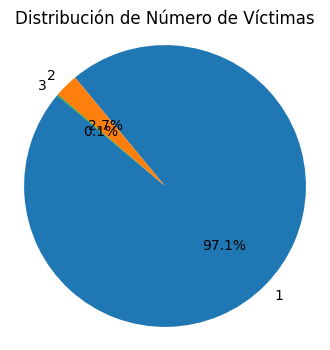

In [24]:
# Calcular la frecuencia de cada valor en la columna "N_VICTIMAS"
frecuencia = df_hechos["N_VICTIMAS"].value_counts()

# Crear un gráfico de tarta
plt.figure(figsize=(4, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.pie(frecuencia, labels=frecuencia.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Número de Víctimas")
plt.axis('equal')  # Hace que el gráfico sea circular

# Mostrar el gráfico
plt.show()

df_hechos.VICTIMA
Conclusiones

Hay 10 tipos diferentes de víctimas involucradas.
El valor más frecuente es "MOTO". Esto significa que "MOTO" es el tipo de víctima más común en los accidentes registrados.
la frecuencia del tipo de víctima más común ("MOTO") es 295. Esto significa que hubo 295 accidentes en los que estuvieron involucradas motocicletas como víctimas.
Victima con mayor frecuencia en accidentes: "MOTO" (42.39%)
Victima con menor frecuencia en accidentes: "PEATON_MOTO" (0.14 %)

In [25]:

col_statistics(df_hechos, "VICTIMA")

registros únicos:  10

count      696
unique      10
top       MOTO
freq       295
Name: VICTIMA, dtype: object

             Cantidad  Porcentaje (%)
VICTIMA                              
MOTO              295           42.39
PEATON            264           37.93
AUTO               83           11.93
BICICLETA          29            4.17
SD                  9            1.29
CARGAS              7            1.01
PASAJEROS           5            0.72
MOVIL               2            0.29
OBJETO FIJO         1            0.14
PEATON_MOTO         1            0.14


<function matplotlib.pyplot.show(close=None, block=None)>

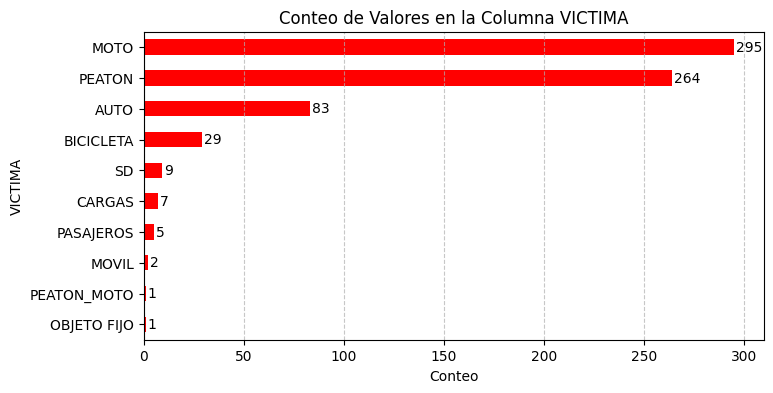

In [27]:
# Filtrar la columna que deseas incluir en el gráfico
columna = df_hechos["VICTIMA"]

# Contar la frecuencia de cada valor único en la columna
conteo_valores = columna.value_counts()
conteo_valores = conteo_valores.sort_values(ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='barh', color='red')
plt.title("Conteo de Valores en la Columna VICTIMA")
plt.xlabel("Conteo")
plt.ylabel("VICTIMA")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(v + 1, i, str(v), ha='left', va='center', color='black')

# Mostrar un grid solo en el eje X del gráfico
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show

df_hechos.ACUSADO
Conclusiones:

Hay 10 valores únicos en la columna "ACUSADO". Esto significa que existen 10 tipos diferentes de entidades o vehículos acusados en los accidentes registrados.
El valor más frecuente en la columna "ACUSADO" es "AUTO". Esto significa que "AUTO" es el tipo de entidad o vehículo más comúnmente acusado en los accidentes registrados en el DataFrame.
Indica que la frecuencia del tipo de entidad o vehículo más comúnmente acusado ("AUTO") es 204. Esto significa que hubo 204 accidentes en los que se acusó a un automóvil como la entidad responsable.
Acusado con mayor frecuencia de accidentes: AUTO (29.31 %)
Acusado con menor frecuencia de accidentes: TREN (0.14 %)

In [28]:
col_statistics(df_hechos, "ACUSADO")

registros únicos:  10

count      696
unique      10
top       AUTO
freq       204
Name: ACUSADO, dtype: object

             Cantidad  Porcentaje (%)
ACUSADO                              
AUTO              204           29.31
PASAJEROS         173           24.86
CARGAS            146           20.98
OBJETO FIJO        62            8.91
MOTO               57            8.19
SD                 23            3.30
MULTIPLE           17            2.44
BICICLETA           7            1.01
OTRO                6            0.86
TREN                1            0.14


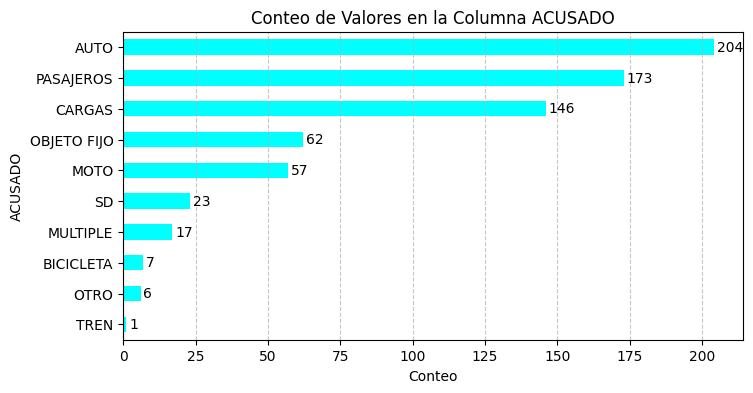

In [29]:
# Filtrar la columna que deseas incluir en el gráfico
columna = df_hechos["ACUSADO"]

# Contar la frecuencia de cada valor único en la columna y ordenar de manera descendente
conteo_valores = columna.value_counts().sort_values(ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='barh', color='cyan')
plt.title("Conteo de Valores en la Columna ACUSADO")
plt.xlabel("Conteo")
plt.ylabel("ACUSADO")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(v + 1, i, str(v), ha='left', va='center', color='black')

# Mostrar un grid solo en el eje X del gráfico
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

df_hechos.AAAA
Conclusiones

Hay 6 años únicos diferentes en la columna "AAAA", desde 2016 hasta 2021.
(Cuartiles): Estos valores representan los cuartiles del conjunto de datos. Por ejemplo, el valor del primer cuartil (25%) es 2017, lo que significa que el 25% de los accidentes ocurrieron en 2017 o antes. El segundo cuartil (50%) es 2018, que es la mediana, indicando que el 50% de los accidentes ocurrieron en 2018 o antes. El tercer cuartil (75%) es 2020, lo que sugiere que el 75% de los accidentes ocurrieron en 2020 o antes.
Año con mayor frecuencia de accidentes: 2016 (20.69%)
Año con menor frecuencia de accidentes: 2020 (11.21%)

In [30]:
col_statistics(df_hechos, "AAAA")

registros únicos:  6

count     696.000000
mean     2018.188218
std         1.683754
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2020.000000
max      2021.000000
Name: AAAA, dtype: float64

      Cantidad  Porcentaje (%)
AAAA                          
2016       144           20.69
2018       143           20.55
2017       131           18.82
2019       103           14.80
2021        97           13.94
2020        78           11.21


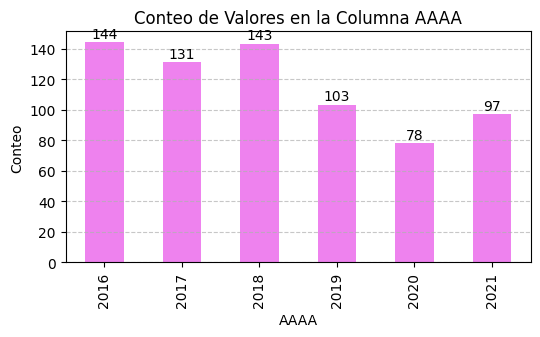

In [31]:
# Filtrar la columna que deseas incluir en el gráfico
columna = df_hechos["AAAA"]

# Contar la frecuencia de cada valor único en la columna
conteo_valores = columna.value_counts()
conteo_valores = conteo_valores.sort_index(ascending=True)

# Crear un gráfico de barras
plt.figure(figsize=(6, 3))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='bar', color='violet')
plt.title("Conteo de Valores en la Columna AAAA")
plt.xlabel("AAAA")
plt.ylabel("Conteo")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

# Mostrar un grid solo en el eje Y del gráfico
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

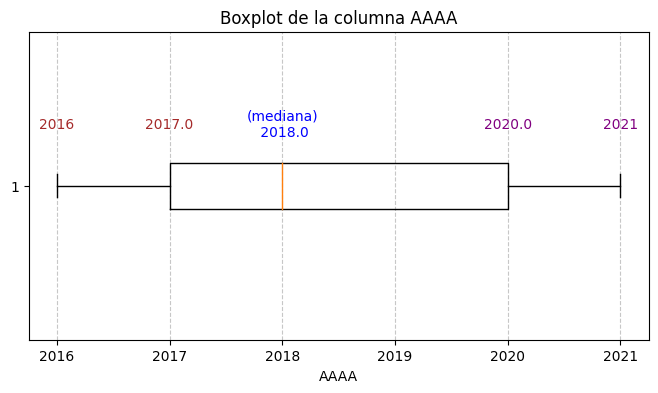

In [32]:
columna = "AAAA"
df = df_hechos
data = df[columna]

# Crear el boxplot con Matplotlib
plt.figure(figsize=(8, 4))  # Tamaño de la figura
plt.boxplot(data, vert=False)  # vert=False para un gráfico horizontal
plt.xlabel(columna)  # Etiqueta del eje x
plt.title('Boxplot de la columna ' + columna)  # Título del gráfico

# Agregar grid al eje y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calcular los cuartiles
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)
minimo = data.min()
maximo = data.max()

# Agregar los valores de los cuartiles al gráfico
plt.text(q1, 1.2, q1, va='center', ha='center', color='brown')
plt.text(q2, 1.2, f"(mediana)\n {q2}", va='center', ha='center', color='blue')
plt.text(q3, 1.2, q3, va='center', ha='center', color='purple')
plt.text(minimo, 1.2, minimo, va='center', ha='center', color='brown')
plt.text(maximo, 1.2, maximo, va='center', ha='center', color='purple')

# Mostrar el gráfico
plt.show()

df_hechos.SEMESTRE
Conclusiones:

El valor más frecuente en la columna "SEMESTRE" es "2", lo que sugiere que la mayoría de los registros corresponden al segundo semestre del año.
El segundo semestre (valor "2") contiene el 51.75% de los registros, mientras que el primer semestre (valor "1") contiene el 48.25% de los registros.

In [33]:

col_statistics(df_hechos, "SEMESTRE")

registros únicos:  12

count        696
unique        12
top       2016_2
freq          80
Name: SEMESTRE, dtype: object

          Cantidad  Porcentaje (%)
SEMESTRE                          
2016_2          80           11.49
2018_2          76           10.92
2017_2          67            9.63
2018_1          67            9.63
2016_1          64            9.20
2017_1          64            9.20
2019_1          56            8.05
2021_1          55            7.90
2019_2          47            6.75
2020_2          47            6.75
2021_2          42            6.03
2020_1          31            4.45


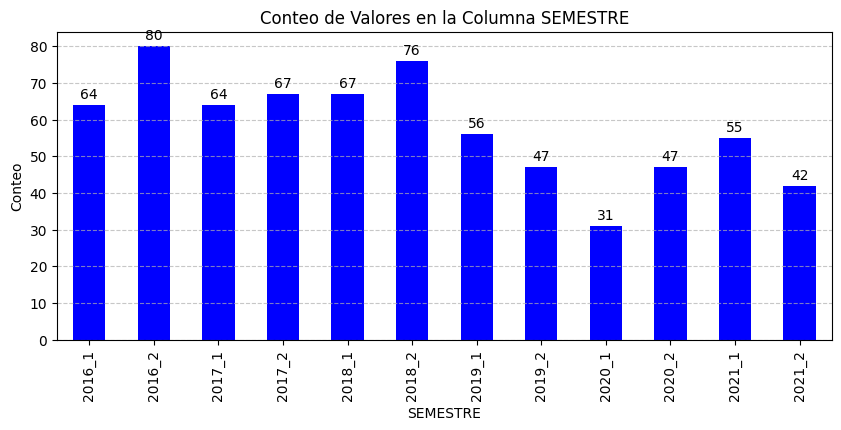

In [34]:
# Filtrar la columna que deseas incluir en el gráfico
columna = df_hechos["SEMESTRE"]

# Contar la frecuencia de cada valor único en la columna y ordenar de manera descendente
conteo_valores = columna.value_counts().sort_index(ascending=True)

# Crear un gráfico de barras verticales
plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='bar', color='blue')
plt.title("Conteo de Valores en la Columna SEMESTRE")
plt.xlabel("SEMESTRE")
plt.ylabel("Conteo")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

# Mostrar un grid solo en el eje Y del gráfico
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


7- Manejo de valores faltantes (nulos)
Objetivos:

Identificar y decidir cómo tratar los valores faltantes en el conjunto de datos, ya sea eliminándolos, imputándolos con valores estimados, o aplicando otras estrategias adecuadas.
Si son mayores al 15% se puede descartar dicha columna.
Si son menores al 5% se pueden inputar con valores estimados (media) o eliminar.
Analizar si se puede inputar un valor particular.
Conclusiones:

Se van a mantener los registros nulos pues no afectarán las metricas la estar dentro de una columna de tipo numérico

In [35]:
df_count_types(df_hechos)


filas completamente nulas:  0


,Column,<class 'str'>,<class 'int'>,Nulos,Nulos %
0,ID,696.0,NaN,0,0.0
1,N_VICTIMAS,NaN,696.0,0,0.0
2,VICTIMA,696.0,NaN,0,0.0
3,ACUSADO,696.0,NaN,0,0.0
4,AAAA,NaN,696.0,0,0.0
5,SEMESTRE,696.0,NaN,0,0.0


In [36]:
df_hechos.isnull().sum()

ID            0
N_VICTIMAS    0
VICTIMA       0
ACUSADO       0
AAAA          0
SEMESTRE      0
dtype: int64

In [37]:
# visualizar los registros con valores nulos
df_hechos[df_hechos.isnull().any(axis=1)]

,ID,N_VICTIMAS,VICTIMA,ACUSADO,AAAA,SEMESTRE


8- Análisis Multivariado
Objetivos:

Si es necesario crear gráficos y visualizaciones para comprender la distribución y las relaciones entre las variables (análisis multivariado):

Tablas pivote (tabla dinámica)
Tablas por agrupación
Diagrama de dispersión: dos variables numéricas
Diagrama de líneas: variable vs tiempo
Diagrama de barras apiladas
Diagrama de barras agrupadas
Calcular KPIs:

KPI 1: tasa de homicidios en siniestros viales

SEMESTRE
N_VICTIMAS_SEMESTRE
POBLACION_SEMESTRE
SEMESTRE_ANTERIOR
N_VICTIMAS_SEMESTRE_ANTERIOR
POBLACION_SEMESTRE_ANTERIOR

FORMULA 1: (porcentaje de variación): {[[(Número de homicidios en siniestros viales del semestre anterior / Población total del semestre anterior) * 100,000] - [(Número de homicidios en siniestros viales del semestre actual / Población total del semestre actual) * 100,000]] / [(Número de homicidios en siniestros viales del semestre anterior / Población total del semestre anterior) * 100,000]} * 100.


KPI 2: Cantidad de accidentes mortales de motociclistas en siniestros viales

ID
VICTIMA
AAAA
AAAA_ANTERIOR

FORMULA 2: (porcentaje de variación): [(Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior)] * 100.


KPI 3: Cantidad de accidentes mortales ocasionado por el mayor responsable de homicidios en siniestros viales del ultimo semestre

ID
ACUSADO
AAAA
SEMESTRE
AAAA_SEMESTRE

FORMULA 3: (porcentaje de variación): {(número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre anterior - número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre actual) / (número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre anterior)} * 100.

Importar dataset de población anual por Comuna
Se importa dataset que contiene población anual por comuna desde el año 2016 hasta el año 2021

In [38]:
# importar la hoja de "poblacion_2010_2025.xls" del archivo "poblacion_2010_2025.xls.xls"
df_total = pd.read_excel("poblacion_2010_2025.xls", sheet_name=0, header=2)
df_total.head(10)

,Comuna,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Total,3028481.0,3033639.0,3038860.0,3044076.0,3049229.0,3054267.0,3059122.0,3063728.0,3068043.0,3072029.0,3075646.0,3078836.0,3081550.0,3083770.0,3085483.0,3086680
1,1,243946.0,245308.0,246689.0,248069.0,249433.0,250770.0,252053.0,253271.0,254408.0,255457.0,256405.0,257235.0,257934.0,258497.0,258922.0,259205
2,2,150714.0,150573.0,150428.0,150278.0,150130.0,149985.0,149848.0,149720.0,149607.0,149510.0,149430.0,149371.0,149337.0,149328.0,149345.0,149389
3,3,191323.0,191536.0,191750.0,191963.0,192171.0,192375.0,192573.0,192763.0,192945.0,193115.0,193276.0,193425.0,193560.0,193682.0,193790.0,193884
4,4,234933.0,235497.0,236071.0,236646.0,237214.0,237769.0,238303.0,238809.0,239279.0,239712.0,240100.0,240437.0,240716.0,240937.0,241096.0,241193
5,5,185301.0,185544.0,185789.0,186034.0,186276.0,186512.0,186740.0,186956.0,187159.0,187348.0,187518.0,187670.0,187800.0,187907.0,187991.0,188053
6,6,183046.0,183309.0,183576.0,183843.0,184105.0,184363.0,184611.0,184846.0,185067.0,185271.0,185456.0,185620.0,185760.0,185875.0,185964.0,186028
7,7,236838.0,237389.0,237946.0,238505.0,239057.0,239597.0,240116.0,240607.0,241065.0,241484.0,241861.0,242188.0,242460.0,242674.0,242828.0,242921
8,8,219638.0,220655.0,221693.0,222733.0,223764.0,224770.0,225737.0,226649.0,227495.0,228266.0,228953.0,229541.0,230018.0,230380.0,230623.0,230745
9,9,168681.0,168964.0,169248.0,169533.0,169814.0,170087.0,170353.0,170605.0,170842.0,171062.0,171264.0,171444.0,171600.0,171733.0,171839.0,171921


In [40]:
# Eliminar filas a partir del índice 16 (incluyendo el índice 16)
indice_inicio = 1
df_poblacion = df_total.drop(df_total.index[indice_inicio:])

# Eliminar columna "Comuna"
df_poblacion = df_poblacion.drop(columns="Comuna")

# Eliminar columnas irrelevantes
columnas_a_eliminar = [2010, 2011, 2012, 2013, 2014, 2022, 2023, 2024, 2025]
df_poblacion = df_poblacion.drop(columns=columnas_a_eliminar)

df_poblacion = df_poblacion.T.reset_index()

# Renombrar las columnas
df_poblacion.rename(columns={'index': 'AAAA',
                         0: 'POBLACION_ANUAL'}, inplace=True)

df_poblacion["AAAA"] = df_poblacion["AAAA"].astype(str)
df_poblacion

,AAAA,POBLACION_ANUAL
0,2015,3054267.0
1,2016,3059122.0
2,2017,3063728.0
3,2018,3068043.0
4,2019,3072029.0
5,2020,3075646.0
6,2021,3078836.0


In [41]:
# crear df con valores concatenados de todos los años y semestres necesarios
# Crear un rango de años desde 2015 hasta 2021
rango_anios = list(range(2015, 2022))

# Crear un DataFrame con los años y los semestres (1 y 2)
df_semestres = pd.DataFrame({'AAAA': [str(anio) for anio in rango_anios for _ in range(2)],
                   'SEM': ["1", "2"] * len(rango_anios)})

# agregar nueva columna
df_semestres["SEMESTRE"] = df_semestres["AAAA"] + "_" + df_semestres["SEM"]
df_semestres = df_semestres.drop(columns="SEM")

df_semestres

,AAAA,SEMESTRE
0,2015,2015_1
1,2015,2015_2
2,2016,2016_1
3,2016,2016_2
4,2017,2017_1
5,2017,2017_2
6,2018,2018_1
7,2018,2018_2
8,2019,2019_1
9,2019,2019_2


In [42]:
# unir df poblacion y df semestres
df_poblacion = pd.merge(df_poblacion, df_semestres, on="AAAA", how="left")

# Reordenar las columnas en el orden deseado
column_order = ['SEMESTRE', 'POBLACION_ANUAL']
df_poblacion = df_poblacion[column_order]

df_poblacion

,SEMESTRE,POBLACION_ANUAL
0,2015_1,3054267.0
1,2015_2,3054267.0
2,2016_1,3059122.0
3,2016_2,3059122.0
4,2017_1,3063728.0
5,2017_2,3063728.0
6,2018_1,3068043.0
7,2018_2,3068043.0
8,2019_1,3072029.0
9,2019_2,3072029.0


KPI 1 - df_kpi_1
FORMULA 1: (porcentaje de variación): {[[(Número de homicidios en siniestros viales del semestre anterior / Población total del semestre anterior) * 100,000] - [(Número de homicidios en siniestros viales del semestre actual / Población total del semestre actual) * 100,000]] / [(Número de homicidios en siniestros viales del semestre anterior / Población total del semestre anterior) * 100,000]} * 100.

COLUMNAS:
Semestre anterior
Número homicidios semestre anterior
Poblacion total en el semestre anterior
Semestre actual
Número homicidios semestre actual
Poblacion total en el semestre actual

In [43]:
# crear nuevo df para obtener valores actuales

df_actual = df_hechos.groupby("SEMESTRE")["N_VICTIMAS"].sum().reset_index()
df_actual = pd.merge(df_actual, df_poblacion, on="SEMESTRE", how="left")
df_actual = df_actual.rename(columns={"N_VICTIMAS": "N_VICTIMAS_SEMESTRE",
                                      "SEMESTRE": "SEMESTRE",
                                      "POBLACION_ANUAL": "POBLACION_ANUAL"})
df_actual

,SEMESTRE,N_VICTIMAS_SEMESTRE,POBLACION_ANUAL
0,2016_1,65,3059122.0
1,2016_2,81,3059122.0
2,2017_1,69,3063728.0
3,2017_2,71,3063728.0
4,2018_1,70,3068043.0
5,2018_2,79,3068043.0
6,2019_1,57,3072029.0
7,2019_2,47,3072029.0
8,2020_1,31,3075646.0
9,2020_2,50,3075646.0


In [44]:
# agregar semestre anterior como llave de union

# Crear un rango de años desde 2015 hasta 2021
lista_semestres = []

# Crear lista de semestres
for anio in range (2015, 2022):
    for sem in range (1,3):
        semestre = str(anio) + "_" + str(sem)
        lista_semestres.append(semestre)

# funcion para validar el semestre anterior de cada registro
def asignar_semestre_anterior(SEMESTRE: str):
    '''
    Asignar semestre anterior de acuerdo a una lista de semestres preestablecida.
    Recibe como parámetro un semestre en formato str de la forma AAAA_SEMESTRE
    '''
    posicion = lista_semestres.index(SEMESTRE)
    return lista_semestres[posicion - 1]

df_actual['SEMESTRE_ANTERIOR'] = df_actual['SEMESTRE'].apply(asignar_semestre_anterior)

df_actual

,SEMESTRE,N_VICTIMAS_SEMESTRE,POBLACION_ANUAL,SEMESTRE_ANTERIOR
0,2016_1,65,3059122.0,2015_2
1,2016_2,81,3059122.0,2016_1
2,2017_1,69,3063728.0,2016_2
3,2017_2,71,3063728.0,2017_1
4,2018_1,70,3068043.0,2017_2
5,2018_2,79,3068043.0,2018_1
6,2019_1,57,3072029.0,2018_2
7,2019_2,47,3072029.0,2019_1
8,2020_1,31,3075646.0,2019_2
9,2020_2,50,3075646.0,2020_1


In [45]:
# crear nuevo df para obtener valores anteriores
df_anterior = df_hechos.groupby("SEMESTRE")["N_VICTIMAS"].sum().reset_index()
df_anterior = pd.merge(df_anterior, df_poblacion, on="SEMESTRE", how="left")
df_anterior = df_anterior.rename(columns={"N_VICTIMAS": "N_VICTIMAS_SEMESTRE_ANTERIOR",
                                          "SEMESTRE": "SEMESTRE_ANTERIOR",
                                          "POBLACION_ANUAL": "POBLACION_ANUAL_ANTERIOR"})
df_anterior

,SEMESTRE_ANTERIOR,N_VICTIMAS_SEMESTRE_ANTERIOR,POBLACION_ANUAL_ANTERIOR
0,2016_1,65,3059122.0
1,2016_2,81,3059122.0
2,2017_1,69,3063728.0
3,2017_2,71,3063728.0
4,2018_1,70,3068043.0
5,2018_2,79,3068043.0
6,2019_1,57,3072029.0
7,2019_2,47,3072029.0
8,2020_1,31,3075646.0
9,2020_2,50,3075646.0


In [46]:
# unir df actual y df anterior

df_kpi_1 = pd.merge(df_actual, df_anterior, on="SEMESTRE_ANTERIOR", how="left")
df_kpi_1

,SEMESTRE,N_VICTIMAS_SEMESTRE,POBLACION_ANUAL,SEMESTRE_ANTERIOR,N_VICTIMAS_SEMESTRE_ANTERIOR,POBLACION_ANUAL_ANTERIOR
0,2016_1,65,3059122.0,2015_2,NaN,NaN
1,2016_2,81,3059122.0,2016_1,65.0,3059122.0
2,2017_1,69,3063728.0,2016_2,81.0,3059122.0
3,2017_2,71,3063728.0,2017_1,69.0,3063728.0
4,2018_1,70,3068043.0,2017_2,71.0,3063728.0
5,2018_2,79,3068043.0,2018_1,70.0,3068043.0
6,2019_1,57,3072029.0,2018_2,79.0,3068043.0
7,2019_2,47,3072029.0,2019_1,57.0,3072029.0
8,2020_1,31,3075646.0,2019_2,47.0,3072029.0
9,2020_2,50,3075646.0,2020_1,31.0,3075646.0


In [47]:
tasa_anterior = (df_kpi_1["N_VICTIMAS_SEMESTRE_ANTERIOR"] / df_kpi_1["POBLACION_ANUAL_ANTERIOR"]) * 100000
tasa_actual = (df_kpi_1["N_VICTIMAS_SEMESTRE"] / df_kpi_1["POBLACION_ANUAL"]) * 100000

df_kpi_1["KPI_1"] = (((tasa_anterior - tasa_actual) / tasa_anterior) * 100).round(2)
df_kpi_1

,SEMESTRE,N_VICTIMAS_SEMESTRE,POBLACION_ANUAL,SEMESTRE_ANTERIOR,N_VICTIMAS_SEMESTRE_ANTERIOR,POBLACION_ANUAL_ANTERIOR,KPI_1
0,2016_1,65,3059122.0,2015_2,NaN,NaN,NaN
1,2016_2,81,3059122.0,2016_1,65.0,3059122.0,-24.62
2,2017_1,69,3063728.0,2016_2,81.0,3059122.0,14.94
3,2017_2,71,3063728.0,2017_1,69.0,3063728.0,-2.90
4,2018_1,70,3068043.0,2017_2,71.0,3063728.0,1.55
5,2018_2,79,3068043.0,2018_1,70.0,3068043.0,-12.86
6,2019_1,57,3072029.0,2018_2,79.0,3068043.0,27.94
7,2019_2,47,3072029.0,2019_1,57.0,3072029.0,17.54
8,2020_1,31,3075646.0,2019_2,47.0,3072029.0,34.12
9,2020_2,50,3075646.0,2020_1,31.0,3075646.0,-61.29


KPI 1 - gráfica
Conclusiones:

Dado que no tenemos datos previos al año 2016-1 nuestra primer medida relaciona el semestre 2016-1 y 2016-2 por eso solo se evidencian valores a partir del semestre 2016-2.

Si el valor del semestre en la gráfica es positivo significa que para ese semestre hubo menos homicidios que el semestre pasado.

Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes de motos vs. el semestre anterior aumentó de manera positiva.

El valor que se representa en la gráfica indica el porcentaje en que se redujo la tasa de homicidios en accidentes de tránsito del semestre anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 10% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

2017-1: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

2019-1: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

2019-2: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue menor que el logrado el semestre anterior.

2021-2: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

4 semestres de 11 cumplieron el objetivo lo cual nos indica que no es positivo el balance de acuerdo a lo planteado inicialmente

5 semestres de 11 tienen un porcentaje de cambio negativo, es decir, aumenta la tasa de homicidios vs. el semestre anterior. Aunque es minoría sigue siendo alarmante la cantidad

posx and posy should be finite values
posx and posy should be finite values


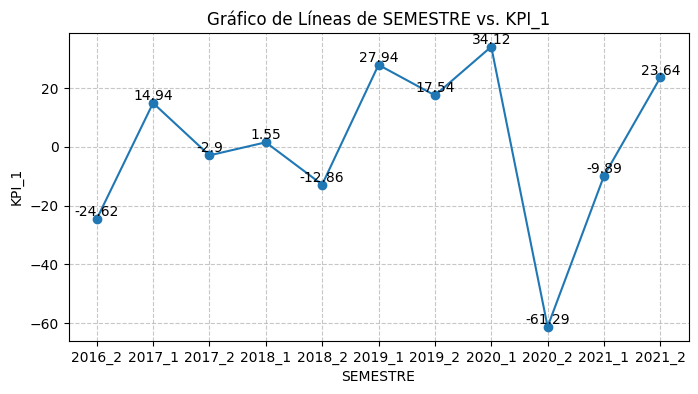

In [48]:
semestre = df_kpi_1["SEMESTRE"]
kpi = df_kpi_1["KPI_1"]

# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(semestre, kpi, marker='o', linestyle='-')
plt.title('Gráfico de Líneas de SEMESTRE vs. KPI_1')
plt.xlabel('SEMESTRE')
plt.ylabel('KPI_1')

# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

KPI 2 - df_kpi_2
FORMULA 2: (porcentaje de variación): [(Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior)] * 100.

COLUMNAS:
Victima = MOTO
Año anterior
Número accidentes año anterior
Año actual
Número accidentes año actual

In [49]:
# filtrar df para consultas del kpi
filtro = "MOTO"
df_filtro = df_hechos[df_hechos["VICTIMA"] == filtro]
df_filtro.head(3)

,ID,N_VICTIMAS,VICTIMA,ACUSADO,AAAA,SEMESTRE
0,2016-0001,1,MOTO,AUTO,2016,2016_1
2,2016-0003,1,MOTO,AUTO,2016,2016_1
3,2016-0004,1,MOTO,SD,2016,2016_1


In [50]:
# crear nuevo df para obtener valores actuales

df_actual = df_filtro.groupby("AAAA")["VICTIMA"].count().reset_index()
df_actual = df_actual.rename(columns={"VICTIMA": "ACCIDENTES"})
df_actual["VICTIMA"] = filtro
df_actual = df_actual[["VICTIMA", "AAAA", "ACCIDENTES"]]
df_actual

,VICTIMA,AAAA,ACCIDENTES
0,MOTO,2016,64
1,MOTO,2017,53
2,MOTO,2018,55
3,MOTO,2019,50
4,MOTO,2020,27
5,MOTO,2021,46


In [51]:
# agregar semestre anterior como llave de union

df_actual['AAAA_ANTERIOR'] = df_actual['AAAA']-1
df_actual

,VICTIMA,AAAA,ACCIDENTES,AAAA_ANTERIOR
0,MOTO,2016,64,2015
1,MOTO,2017,53,2016
2,MOTO,2018,55,2017
3,MOTO,2019,50,2018
4,MOTO,2020,27,2019
5,MOTO,2021,46,2020


In [52]:
# crear nuevo df para obtener valores anteriores

df_anterior = df_filtro.groupby("AAAA")["VICTIMA"].count().reset_index()
df_anterior = df_anterior.rename(columns={"VICTIMA": "ACCIDENTES_ANTERIOR",
                                          "AAAA": "AAAA_ANTERIOR"})
df_anterior

,AAAA_ANTERIOR,ACCIDENTES_ANTERIOR
0,2016,64
1,2017,53
2,2018,55
3,2019,50
4,2020,27
5,2021,46


In [53]:
# unir df actual y df anterior

df_kpi_2 = pd.merge(df_actual, df_anterior, on="AAAA_ANTERIOR", how="left")
df_kpi_2

,VICTIMA,AAAA,ACCIDENTES,AAAA_ANTERIOR,ACCIDENTES_ANTERIOR
0,MOTO,2016,64,2015,NaN
1,MOTO,2017,53,2016,64.0
2,MOTO,2018,55,2017,53.0
3,MOTO,2019,50,2018,55.0
4,MOTO,2020,27,2019,50.0
5,MOTO,2021,46,2020,27.0


In [54]:
anterior = df_kpi_2["ACCIDENTES_ANTERIOR"]
actual = df_kpi_2["ACCIDENTES"]

df_kpi_2["KPI_2"] = (((anterior - actual) / anterior) * 100).round(2)
df_kpi_2

,VICTIMA,AAAA,ACCIDENTES,AAAA_ANTERIOR,ACCIDENTES_ANTERIOR,KPI_2
0,MOTO,2016,64,2015,NaN,NaN
1,MOTO,2017,53,2016,64.0,17.19
2,MOTO,2018,55,2017,53.0,-3.77
3,MOTO,2019,50,2018,55.0,9.09
4,MOTO,2020,27,2019,50.0,46.00
5,MOTO,2021,46,2020,27.0,-70.37


KPI 2 - gráfica
Conclusiones:

Dado que no tenemos datos previos al año 2016 nuestra primer medida relaciona el año 2016 y 2017 por eso solo se evidencian valores a partir del año 2017.

Si el valor del año en la gráfica es positivo significa que para ese año hubo menos homicidios que el año pasado.

Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes de motos vs. el año anterior aumentó de manera positiva.

El valor que se representa en la gráfica indica el porcentaje en que se redujo la cantidad de homicidios en accidentes de motos del año anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 7% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

2017: En comparación con el año anterior se redujeron los homicidios y dado que no tenemos valores para el año anterior no podemos decir si fue mayor o menor respecto de ese año.

2019: En comparación con el año anterior se redujeron los homicidios y ese numero fue mayor que el logrado el año anterior.

2020: En comparación con el año anterior se redujeron los homicidios y ese numero fue mayor que el logrado el año anterior.

3 años de 5 cumplieron el objetivo lo cual nos indica que es positivo el balance de acuerdo a lo planteado inicialmente

2 años de 5 tienen un porcentaje de cambio negativo, es decir, aumenta la tasa de accidentes en moto vs. el año anterior. Aunque es minoría sigue siendo alarmante la cantidad

posx and posy should be finite values
posx and posy should be finite values


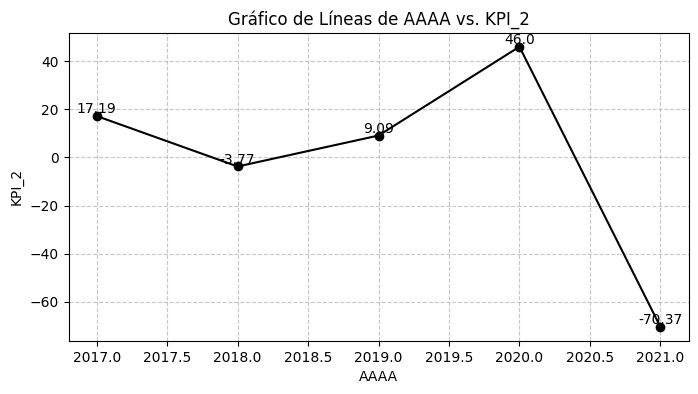

In [55]:
semestre = df_kpi_2["AAAA"]
kpi = df_kpi_2["KPI_2"]

# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(semestre, kpi, marker='o', linestyle='-', color="black")
plt.title('Gráfico de Líneas de AAAA vs. KPI_2')
plt.xlabel('AAAA')
plt.ylabel('KPI_2')

# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

KPI 3 - df_kpi_3
FORMULA 3: (porcentaje de variación): {(número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre anterior - número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre actual) / (número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre anterior)} * 100.

COLUMNAS:
Mayor responsable de accidentes
Semestre anterior
Número accidentes semestre anterior
Semestre actual
Número accidentes semestre actual

In [56]:
# encontrar el ultimo semestre
lista_filtro_1 = df_hechos["SEMESTRE"].unique().tolist()
filtro_1 = sorted(lista_filtro_1, reverse=True)[0]

filtro_1

'2021_2'

In [57]:
# filtrar por el ultimo semestre
df_filtro_1 = df_hechos[df_hechos["SEMESTRE"] == filtro_1]

# encontrar el mayor responsable de accidentes despues de filtrar el último semestre
df_filtro_2 = df_filtro_1["ACUSADO"].value_counts().sort_values(ascending=False).reset_index()
filtro_2 = df_filtro.loc[0,"ACUSADO"]

filtro_2

'AUTO'

In [58]:
# filtrar df para consultas del kpi
df_filtro = df_hechos[df_hechos["ACUSADO"] == filtro_2]
df_filtro.head(3)

,ID,N_VICTIMAS,VICTIMA,ACUSADO,AAAA,SEMESTRE
0,2016-0001,1,MOTO,AUTO,2016,2016_1
2,2016-0003,1,MOTO,AUTO,2016,2016_1
6,2016-0009,1,MOTO,AUTO,2016,2016_1


In [59]:
# crear nuevo df para obtener valores actuales

df_actual = df_filtro.groupby("SEMESTRE")["ACUSADO"].count().reset_index()
df_actual = df_actual.rename(columns={"ACUSADO": "ACCIDENTES"})
df_actual["ACUSADO"] = filtro_2
df_actual = df_actual[["ACUSADO", "SEMESTRE", "ACCIDENTES"]]
df_actual

,ACUSADO,SEMESTRE,ACCIDENTES
0,AUTO,2016_1,18
1,AUTO,2016_2,21
2,AUTO,2017_1,21
3,AUTO,2017_2,18
4,AUTO,2018_1,18
5,AUTO,2018_2,19
6,AUTO,2019_1,22
7,AUTO,2019_2,11
8,AUTO,2020_1,8
9,AUTO,2020_2,17


In [62]:
# agregar semestre anterior como llave de union

# Crear un rango de años desde 2015 hasta 2021
lista_semestres = []

# Crear lista de semestres
for anio in range (2015, 2022):
    for sem in range (1,3):
        semestre = str(anio) + "_" + str(sem)
        lista_semestres.append(semestre)

# funcion para validar el semestre anterior de cada registro
def asignar_semestre_anterior(SEMESTRE: str):
    '''
    Asignar semestre anterior de acuerdo a una lista de semestres preestablecida.
    Recibe como parámetro un semestre en formato str de la forma AAAA_SEMESTRE
    '''
    posicion = lista_semestres.index(SEMESTRE)
    return lista_semestres[posicion - 1]

df_actual['SEMESTRE_ANTERIOR'] = df_actual['SEMESTRE'].apply(asignar_semestre_anterior)

df_actual

,ACUSADO,SEMESTRE,ACCIDENTES,SEMESTRE_ANTERIOR
0,AUTO,2016_1,18,2015_2
1,AUTO,2016_2,21,2016_1
2,AUTO,2017_1,21,2016_2
3,AUTO,2017_2,18,2017_1
4,AUTO,2018_1,18,2017_2
5,AUTO,2018_2,19,2018_1
6,AUTO,2019_1,22,2018_2
7,AUTO,2019_2,11,2019_1
8,AUTO,2020_1,8,2019_2
9,AUTO,2020_2,17,2020_1


In [63]:
# crear nuevo df para obtener valores anteriores

df_anterior = df_filtro.groupby("SEMESTRE")["ACUSADO"].count().reset_index()
df_anterior = df_anterior.rename(columns={"ACUSADO": "ACCIDENTES_ANTERIOR",
                                          "SEMESTRE": "SEMESTRE_ANTERIOR"})
df_anterior

,SEMESTRE_ANTERIOR,ACCIDENTES_ANTERIOR
0,2016_1,18
1,2016_2,21
2,2017_1,21
3,2017_2,18
4,2018_1,18
5,2018_2,19
6,2019_1,22
7,2019_2,11
8,2020_1,8
9,2020_2,17


In [64]:
# unir df actual y df anterior

df_kpi_3 = pd.merge(df_actual, df_anterior, on="SEMESTRE_ANTERIOR", how="left")
df_kpi_3

,ACUSADO,SEMESTRE,ACCIDENTES,SEMESTRE_ANTERIOR,ACCIDENTES_ANTERIOR
0,AUTO,2016_1,18,2015_2,NaN
1,AUTO,2016_2,21,2016_1,18.0
2,AUTO,2017_1,21,2016_2,21.0
3,AUTO,2017_2,18,2017_1,21.0
4,AUTO,2018_1,18,2017_2,18.0
5,AUTO,2018_2,19,2018_1,18.0
6,AUTO,2019_1,22,2018_2,19.0
7,AUTO,2019_2,11,2019_1,22.0
8,AUTO,2020_1,8,2019_2,11.0
9,AUTO,2020_2,17,2020_1,8.0


In [65]:
anterior = df_kpi_3["ACCIDENTES_ANTERIOR"]
actual = df_kpi_3["ACCIDENTES"]

df_kpi_3["KPI_3"] = (((anterior - actual) / anterior) * 100).round(2)
df_kpi_3

,ACUSADO,SEMESTRE,ACCIDENTES,SEMESTRE_ANTERIOR,ACCIDENTES_ANTERIOR,KPI_3
0,AUTO,2016_1,18,2015_2,NaN,NaN
1,AUTO,2016_2,21,2016_1,18.0,-16.67
2,AUTO,2017_1,21,2016_2,21.0,0.00
3,AUTO,2017_2,18,2017_1,21.0,14.29
4,AUTO,2018_1,18,2017_2,18.0,0.00
5,AUTO,2018_2,19,2018_1,18.0,-5.56
6,AUTO,2019_1,22,2018_2,19.0,-15.79
7,AUTO,2019_2,11,2019_1,22.0,50.00
8,AUTO,2020_1,8,2019_2,11.0,27.27
9,AUTO,2020_2,17,2020_1,8.0,-112.50


KPI 3 - gráfica
Conclusiones:

El mayor responsable de accidentes de tránsito del último semestre (2021-2) es el auto por está razón de realiza todo el análisis para este acusado.

Dado que no tenemos datos previos al año 2016 nuestra primer medida relaciona el semestre 2016_1 y 2016_2 por eso solo se evidencian valores a partir del semestre 2016_2.

Si el valor del semestre en la gráfica es positivo significa que para ese semestre hubo menos accidentes ocasionados por autos que el semestre pasado.

Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes ocasionados por autos vs. el semestre anterior aumentó de manera positiva.

El valor que se representa en la gráfica indica el porcentaje en que se redujo la cantidad de accidentes causados por autos del semestre anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 5% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

2017_2: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado..

2019_2: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado.

2020_1: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es menor que la del semestre pasado.

2021_1: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado.

4 semestres de 11 cumplieron el objetivo lo cual nos indica que no es positivo el balance de acuerdo a lo planteado inicialmente

5 semestres de 11 tienen un porcentaje de cambio negativo, es decir, aumentan los accidentes ocasionados vs. el semestre anterior. Aunque es minoría sigue siendo alarmante la cantidad

posx and posy should be finite values
posx and posy should be finite values


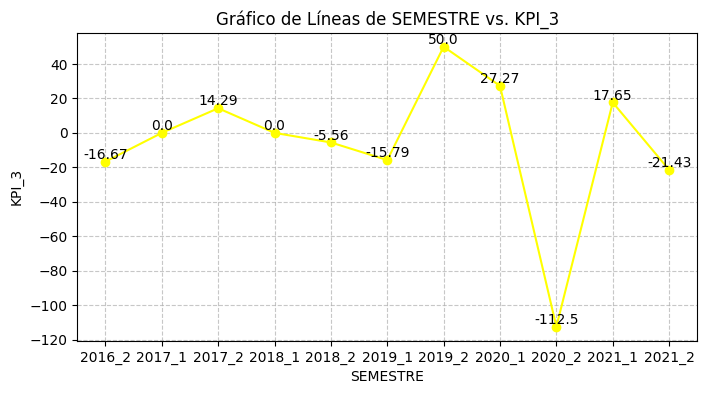

In [66]:
semestre = df_kpi_3["SEMESTRE"]
kpi = df_kpi_3["KPI_3"]

# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(semestre, kpi, marker='o', linestyle='-', color="yellow")
plt.title('Gráfico de Líneas de SEMESTRE vs. KPI_3')
plt.xlabel('SEMESTRE')
plt.ylabel('KPI_3')

# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

9- Exportar CSV
Obervaciones y conclusiones:

Se exportan 4 df. Uno con la data completa y otros 3 con la data de cada KPI

In [67]:
# Exportar df_hechos a un archivo CSV
df_hechos.to_csv('hechos.csv', index=False)
# Exportar df_kpi_1 a un archivo CSV
df_kpi_1.to_csv('kpi1.csv', index=False)
# Exportar df_kpi_2 a un archivo CSV
df_kpi_2.to_csv('kpi2.csv', index=False)
# Exportar df_kpi_3 a un archivo CSV
df_kpi_3.to_csv('kpi3.csv', index=False)